In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\alexa\Desktop\cs216finalproject\Allstatesinsurvey\all_deaths_clean.csv', encoding='unicode_escape')

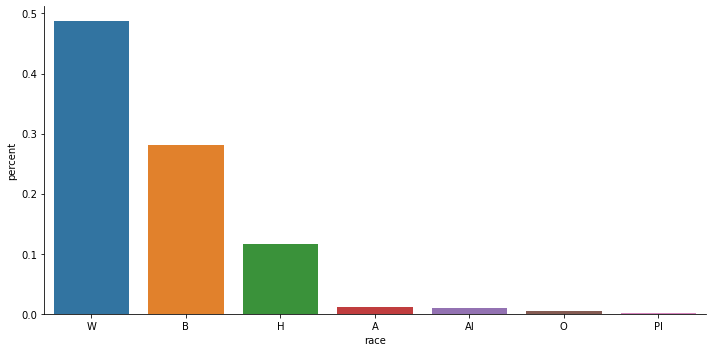

In [31]:
count_race = df.groupby("race").count().sort_values(by="id", ascending=False)["id"]
prop_race = [x/len(df) for x in count_race]
df_race = pd.DataFrame({"race":count_race.index.values, "percent":prop_race})
sns.catplot(data = df_race, x = "race", y = "percent", kind = "bar", aspect = 2)

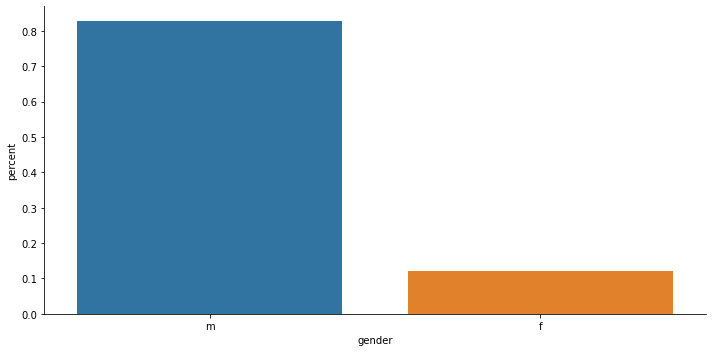

In [38]:
count_gender = df.groupby("gender").count().sort_values(by="id", ascending=False)["id"]
prop_gender = [x/len(df) for x in count_gender]
df_gender = pd.DataFrame({"gender":count_gender.index.values, "percent":prop_gender})
sns.catplot(data = df_gender, x = "gender", y = "percent", kind = "bar", aspect = 2)

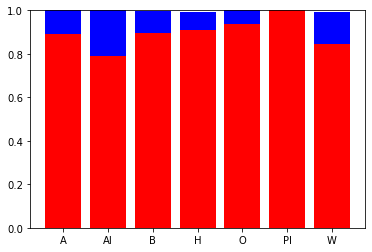

In [76]:
race_and_gender = df.pivot_table("id", index = "race", columns = "gender", aggfunc = "count")
races = race_and_gender.index.values
female_race = [race_and_gender.loc[y, "f"]/count_race[y] for y in races]
male_race = [race_and_gender.loc[y, "m"]/count_race[y] for y in races]

plt.bar(races, male_race, color='r')
plt.bar(races, female_race, bottom=male_race, color='b')
plt.show()

<AxesSubplot:xlabel='race'>

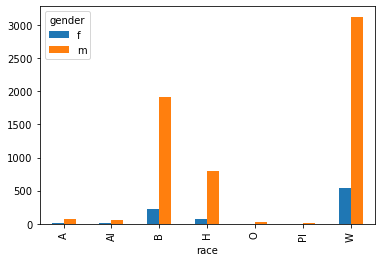

In [78]:

race_and_gender.plot(kind="bar")

<AxesSubplot:xlabel='race'>

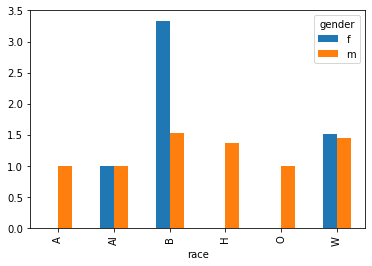

In [82]:
race_and_media = df.pivot_table("num_media_descriptors", index = "race", columns = "gender", aggfunc = "mean")
race_and_media.plot(kind = "bar")